<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-Assignment2/blob/main/Dm_Time_Series_Forecasting__Univariate_with_Exogenous_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.7 MB/s eta 0:0

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
#importing pandas
import pandas as pd
import numpy as np

In [56]:
#Time Series Forecasting Experiment
from pycaret.time_series import TSForecastingExperiment
e1=TSForecastingExperiment()

In [69]:
dt=get_data("airquality")
dt["index"]=pd.to_datetime(dt["Date"]+" "+" "+dt["Time"])
dt.drop(columns=["Date", "Time"], inplace=True)
target = "CO(GT)"

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [70]:
dt[dt[target] == -200].head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,index
10,-200.0,1011,14,1.3,527,21,1818,34,1197,445,10.1,60.5,0.7465,2004-03-11 04:00:00
34,-200.0,831,10,1.1,506,21,1893,32,1134,384,6.1,65.9,0.6248,2004-03-12 04:00:00
39,-200.0,1545,-200,22.1,1353,-200,767,-200,2058,1588,9.2,56.2,0.6561,2004-03-12 09:00:00
58,-200.0,1147,56,6.2,821,109,1132,83,1412,992,7.0,71.1,0.7158,2004-03-13 04:00:00
82,-200.0,1130,56,5.2,773,70,1130,82,1452,1051,12.1,61.1,0.8603,2004-03-14 04:00:00


In [73]:
#experiment analysis
e1=TSForecastingExperiment()

In [76]:
e1.setup(data=dt,target=target,index="index",fh=48,numeric_imputation_target="ffill",numeric_imputation_exogenous="ffill",
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 13)"
5,Transformed data shape,"(9357, 13)"
6,Transformed train set shape,"(9309, 13)"
7,Transformed test set shape,"(48, 13)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


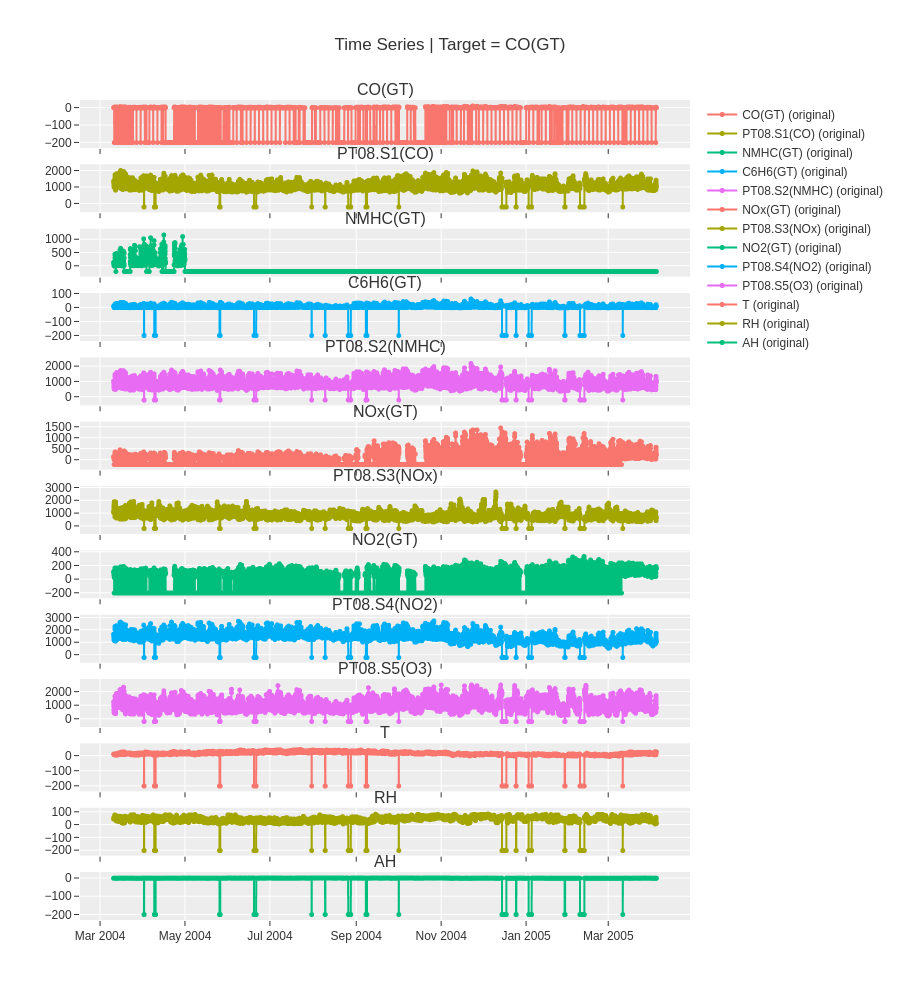

In [79]:
#here we plot target variable with any exogenous variables
#the data is huge, so plotting an interactive plot can slow down the colab.
e1.plot_model(fig_kwargs={"renderer":"png","width":900,"height":1000})

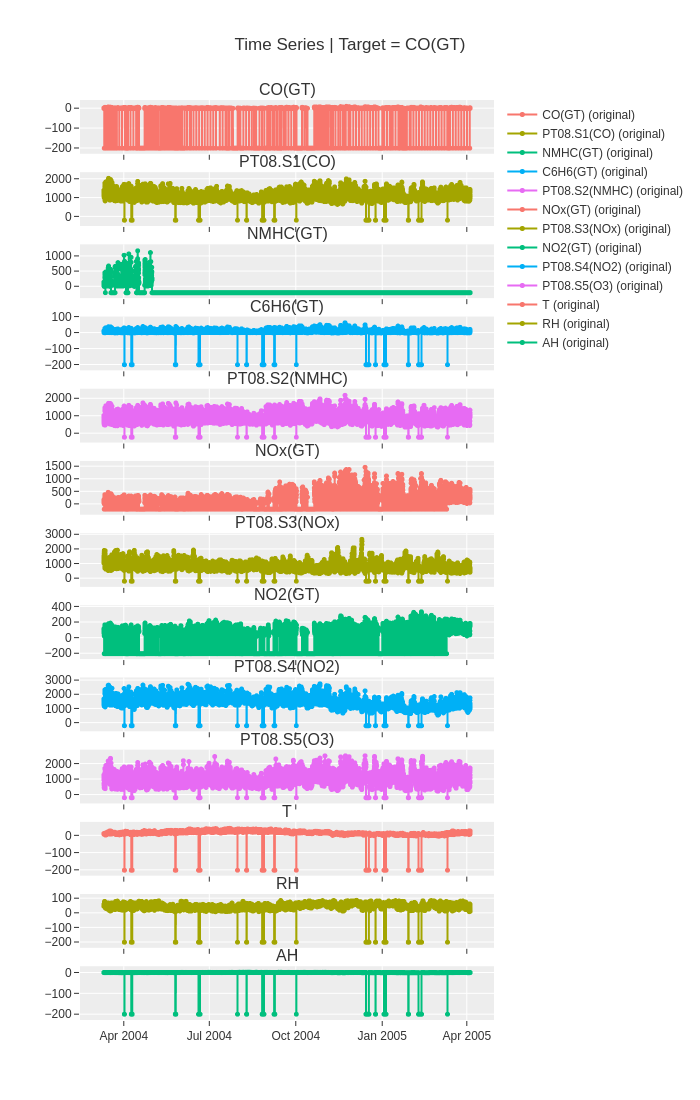

In [82]:
e1.plot_model(plot="ts",fig_kwargs={
        'height':1100,
        "resampler_kwargs":
         {
            "default_n_shown_samples":700,
            "show_dash": {"mode": "inline", "port": 8055},
        }, },
)

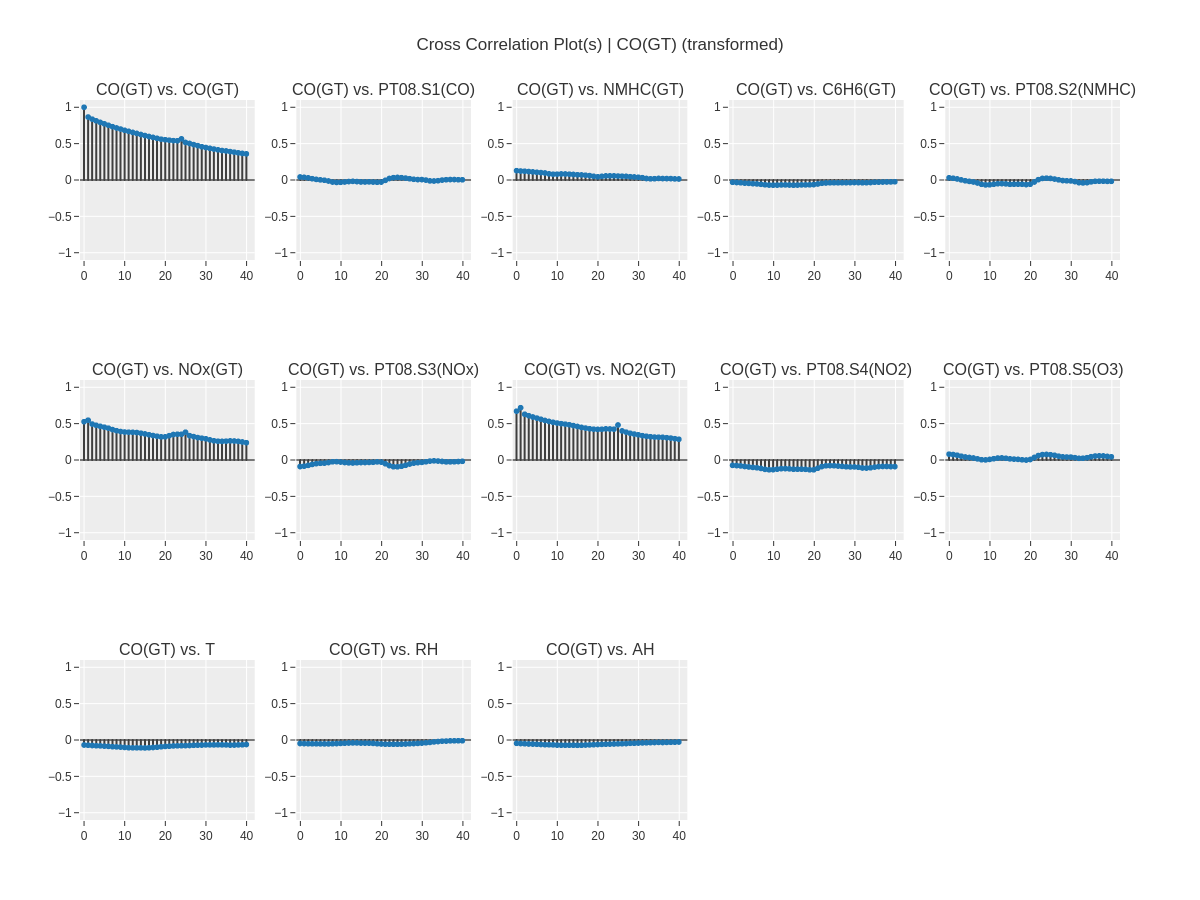

In [83]:
e1.plot_model(plot="ccf",fig_kwargs={"height":900,"width":1200})